<a href="https://colab.research.google.com/github/sumyuck/ML-learning/blob/main/cvdl/CVDL_p_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

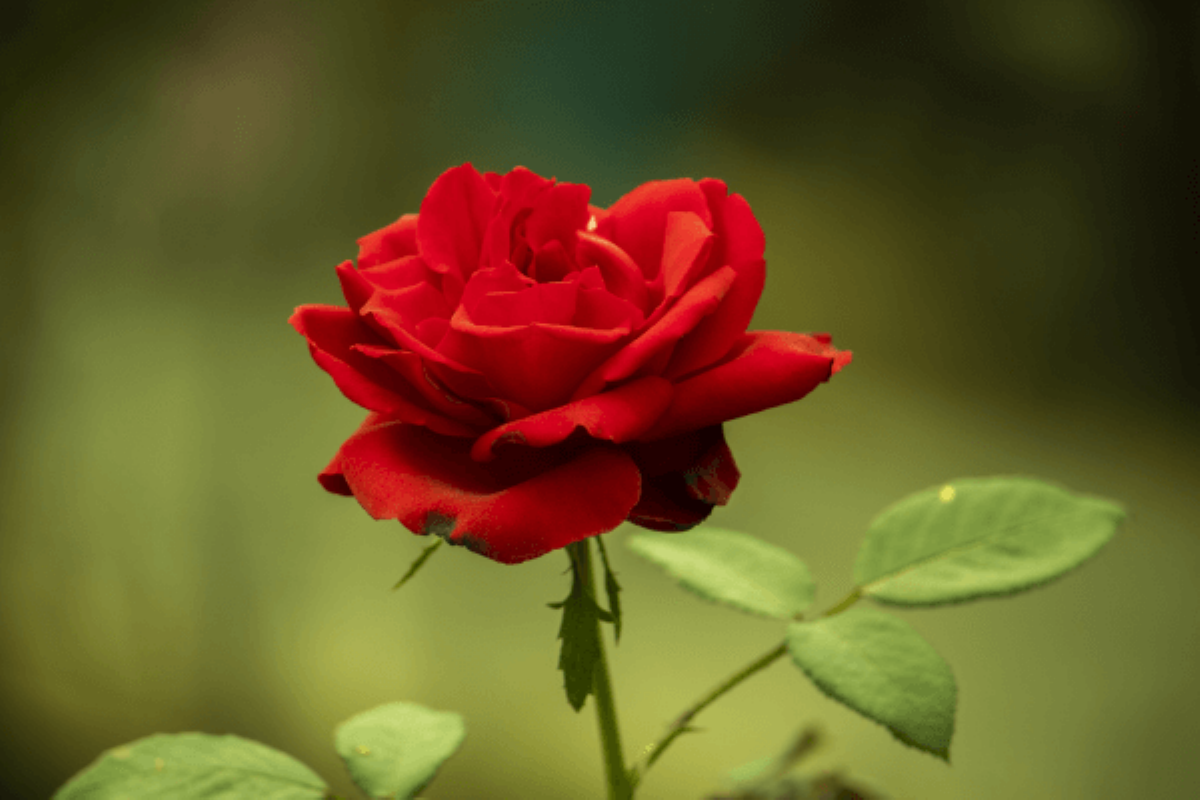

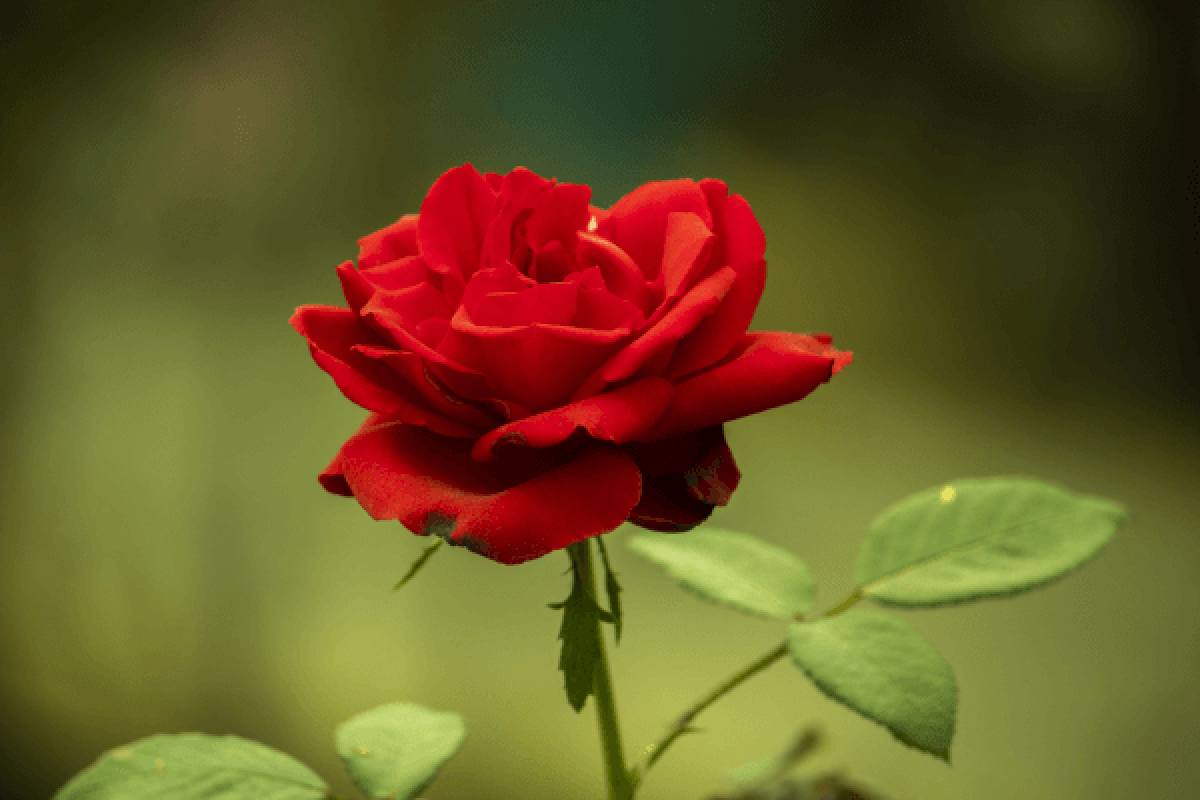

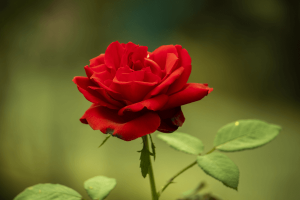

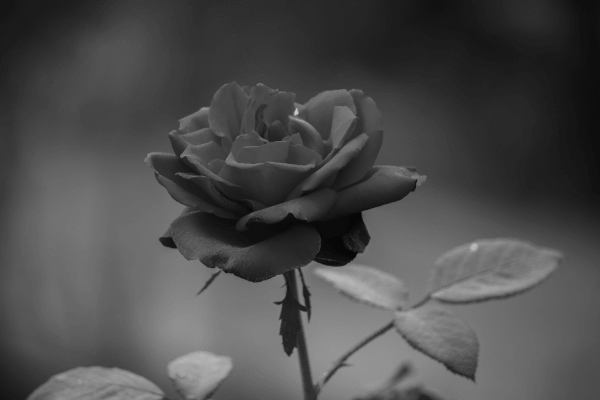

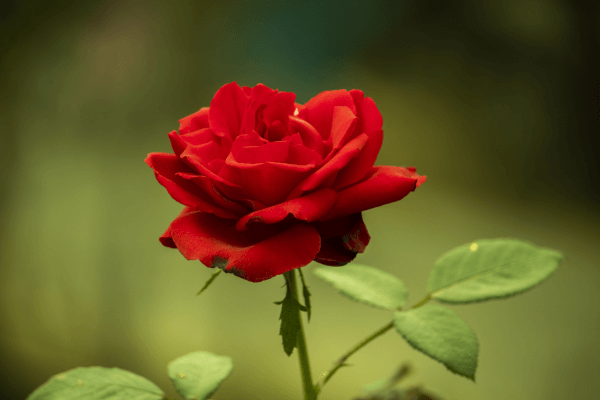

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

def double_resize(image, new_width, new_height):
    original_height, original_width = image.shape[:2]
    new_height = original_height * 2
    new_width = original_width * 2

    resized_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for i in range(original_height):
        for j in range(original_width):
            resized_image[2*i, 2*j] = image[i, j]

            if j + 1 < original_width:
              resized_image[2*i, 2*j+1] = np.mean([image[i, j], image[i, j+1]], axis=0)
            else:
              resized_image[2*i, 2*j+1] = image[i, j]

            if i + 1 < original_height:
              resized_image[2*i+1, 2*j] = np.mean([image[i, j], image[i+1, j]], axis=0)
            else:
              resized_image[2*i+1, 2*j] = image[i, j]

            if i + 1 < original_height and j + 1 < original_width:
              resized_image[2*i+1, 2*j+1] = np.mean([image[i, j], image[i+1, j], image[i, j+1], image[i+1, j+1]], axis=0)
            elif i + 1 < original_height:
              resized_image[2*i+1, 2*j+1] = np.mean([image[i, j], image[i+1, j]], axis=0)
            elif j + 1 < original_width:
                resized_image[2*i+1, 2*j+1] = np.mean([image[i, j], image[i, j+1]], axis=0)
            else:
              resized_image[2*i+1, 2*j+1] = image[i, j]


    return resized_image

def zoom_resize(image):
    original_height, original_width = image.shape[:2]
    new_height = original_height * 2
    new_width = original_width * 2

    resized_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for i in range(original_height):
        for j in range(original_width):
            pixel_value = image[i, j]
            resized_image[2*i:2*i+2, 2*j:2*j+2] = pixel_value

    return resized_image

def half_resize(image, new_width, new_height):
    original_height, original_width = image.shape[:2]
    new_height = original_height // 2
    new_width = original_width // 2

    resized_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):

            pixels = []
            if i*2 < original_height and j*2 < original_width:
                pixels.append(image[i*2, j*2])
            if i*2 < original_height and j*2+1 < original_width:
                pixels.append(image[i*2, j*2+1])
            if i*2+1 < original_height and j*2 < original_width:
                pixels.append(image[i*2+1, j*2])
            if i*2+1 < original_height and j*2+1 < original_width:
                pixels.append(image[i*2+1, j*2+1])

            if pixels:
                resized_image[i, j] = np.mean(pixels, axis=0)
            else:
                resized_image[i, j] = np.zeros(image.shape[2], dtype=image.dtype)


    return resized_image

def custom_grayscale(image):
    grayscale_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            grayscale_image[i, j] = int(np.mean(image[i, j]))
    return grayscale_image

def process_image(image):
    double_size = double_resize(image, int(image.shape[1]*2), int(image.shape[0]*2))

    zoom_size = zoom_resize(image)

    half_size = half_resize(image, int(image.shape[1]/2), int(image.shape[0]/2))

    grayscale = custom_grayscale(image)

    return double_size, zoom_size, half_size, grayscale

image_path = 'flower.webp'

if os.path.exists(image_path):
    original_image = cv2.imread(image_path)

    if original_image is not None:
        double_image, zoom_image, half_image, grayscale_image = process_image(original_image)

        cv2_imshow(double_image)
        cv2_imshow(zoom_image)
        cv2_imshow(half_image)
        cv2_imshow(grayscale_image)
        cv2_imshow(original_image)

        cv2.imwrite('double_image.jpg', double_image)
        cv2.imwrite('zoom_image.jpg', zoom_image)
        cv2.imwrite('resized_image.jpg', half_image)
        cv2.imwrite('grayscale_image.jpg', grayscale_image)

    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")

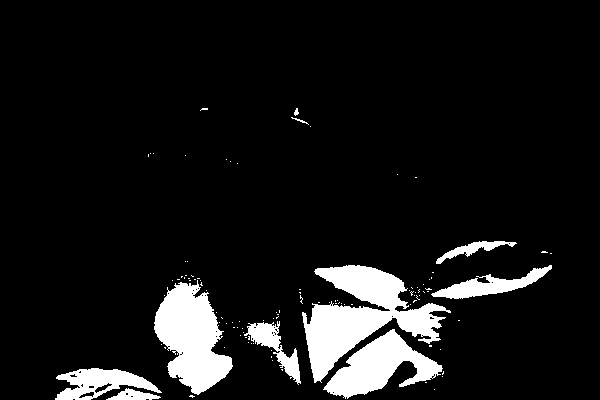

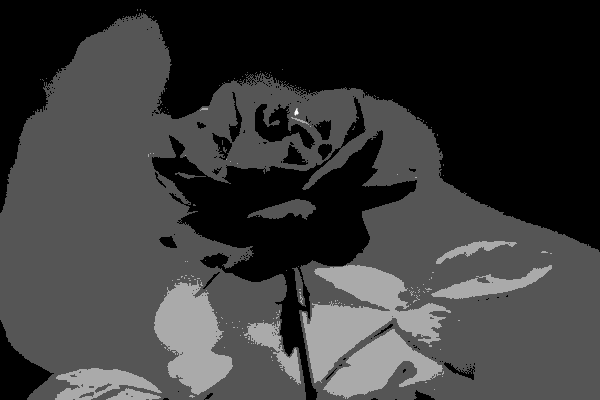

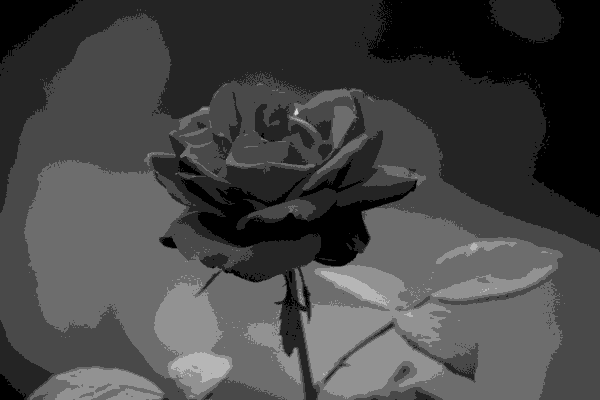

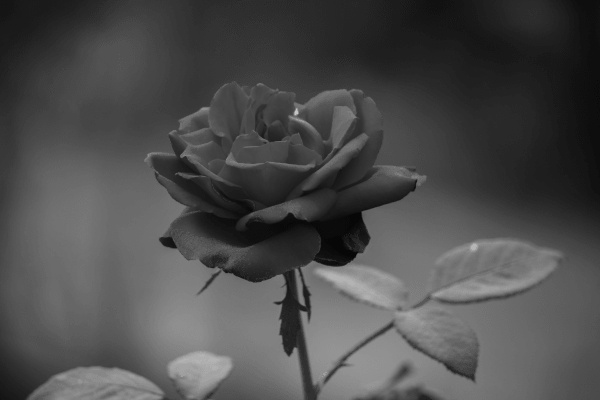

In [ ]:
#quantisation

image_path = 'grayscale_image.jpg'

def two_level_quantization(image):
    quantized_image = np.zeros_like(image)
    quantized_image[image > 127] = 255
    quantized_image[image <= 127] = 0
    return quantized_image

def four_level_quantization(image):
    quantized_image = np.zeros_like(image)
    quantized_image[(image >= 0) & (image <= 63)] = 0
    quantized_image[(image > 63) & (image <= 127)] = 85
    quantized_image[(image > 127) & (image <= 191)] = 170
    quantized_image[(image > 191) & (image <= 255)] = 255
    return quantized_image

def eight_level_quantization(image):
    quantized_image = np.zeros_like(image)
    quantized_image[(image >= 0) & (image <= 31)] = 0
    quantized_image[(image > 31) & (image <= 63)] = 36
    quantized_image[(image > 63) & (image <= 95)] = 73
    quantized_image[(image > 95) & (image <= 127)] = 109
    quantized_image[(image > 127) & (image <= 159)] = 146
    quantized_image[(image > 159) & (image <= 191)] = 182
    quantized_image[(image > 191) & (image <= 223)] = 219
    quantized_image[(image > 223) & (image <= 255)] = 255
    return quantized_image


def process_image(image):
    two_level = two_level_quantization(image)
    four_level = four_level_quantization(image)
    eight_level = eight_level_quantization(image)
    return two_level, four_level, eight_level

if os.path.exists(image_path):
    original_image = cv2.imread(image_path)

    if original_image is not None:
        two_level, four_level, eight_level = process_image(original_image)

        cv2_imshow(two_level)
        cv2_imshow(four_level)
        cv2_imshow(eight_level)
        cv2_imshow(original_image)

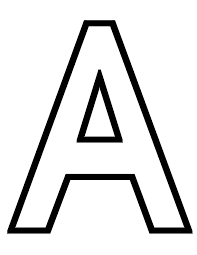

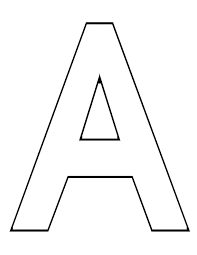

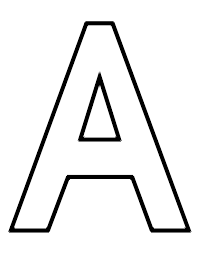

In [ ]:
# Apply minimum filter
min_filtered = cv2.erode(original_image, kernel=np.ones((3,3), np.uint8))

# Apply maximum filter
max_filtered = cv2.dilate(original_image, kernel=np.ones((3,3), np.uint8))

# Apply median filter
median_filtered = cv2.medianBlur(original_image, 3)  # kernel size should be odd

cv2_imshow(min_filtered)
cv2_imshow(max_filtered)
cv2_imshow(median_filtered)

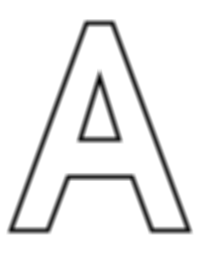

In [ ]:
# Apply averaging filter (simple blur)
average_filtered = cv2.blur(original_image, (5, 5))  # Adjust kernel size as needed
cv2_imshow(average_filtered)

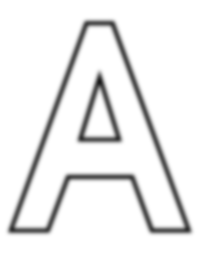

In [ ]:
# Apply weighted averaging filter (Gaussian blur)
weighted_average_filtered = cv2.GaussianBlur(original_image, (11, 11), 0)  # Adjust kernel size as needed
cv2_imshow(weighted_average_filtered)
